In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
  
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
filename=['AAPL_n.csv', 'AEO_n.csv', 'BAC_n.csv','WMT_n.csv']

df_aapl = pd.read_csv(filename[0])
df_aeo = pd.read_csv(filename[1])
df_bac = pd.read_csv(filename[2])
df_wmt = pd.read_csv(filename[3])

print (df_aapl.head(5))

   Unnamed: 0           Date  marketAverage  marketChangeOverTime  \
0           0  2/1/2019 9:30        167.058              0.000000   
1           1  2/1/2019 9:31        167.182              0.000742   
2           2  2/1/2019 9:32        167.051             -0.000042   
3           3  2/1/2019 9:33        166.945             -0.000676   
4           4  2/1/2019 9:34        167.045             -0.000078   

   marketClose  marketHigh  marketLow  marketNotional  marketNumberOfTrades  \
0      167.150      167.55     166.67    1.319461e+08                  1766   
1      167.175      167.42     166.80    2.853055e+07                  1143   
2      166.910      167.20     166.88    2.232776e+07                  1016   
3      166.958      167.11     166.77    2.014459e+07                   839   
4      167.180      167.19     166.92    1.707804e+07                   843   

   marketOpen  marketVolume  
0      166.93        789821  
1      167.21        170656  
2      167.17       

In [3]:
df_aapl = df_aapl.iloc[:,1::]
df_aeo = df_aeo.iloc[:,1::]
df_bac = df_bac.iloc[:,1::]
df_wmt = df_wmt.iloc[:,1::]

print (df_aapl.head(5))

            Date  marketAverage  marketChangeOverTime  marketClose  \
0  2/1/2019 9:30        167.058              0.000000      167.150   
1  2/1/2019 9:31        167.182              0.000742      167.175   
2  2/1/2019 9:32        167.051             -0.000042      166.910   
3  2/1/2019 9:33        166.945             -0.000676      166.958   
4  2/1/2019 9:34        167.045             -0.000078      167.180   

   marketHigh  marketLow  marketNotional  marketNumberOfTrades  marketOpen  \
0      167.55     166.67    1.319461e+08                  1766      166.93   
1      167.42     166.80    2.853055e+07                  1143      167.21   
2      167.20     166.88    2.232776e+07                  1016      167.17   
3      167.11     166.77    2.014459e+07                   839      166.97   
4      167.19     166.92    1.707804e+07                   843      166.96   

   marketVolume  
0        789821  
1        170656  
2        133658  
3        120666  
4        102236  


<AxesSubplot:>

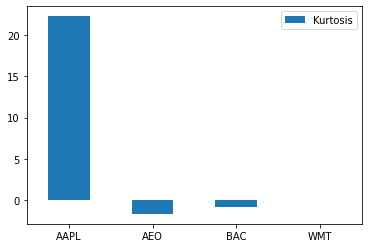

In [4]:
#kurtosis
aapl_kurtosis = df_aapl['marketClose'].kurtosis()
aeo_kurtosis = df_aeo['marketClose'].kurtosis()
bac_kurtosis = df_bac['marketClose'].kurtosis()
wmt_kurtosis = df_wmt['marketClose'].kurtosis()

kurtosis = np.array([aapl_kurtosis,aeo_kurtosis, bac_kurtosis,wmt_kurtosis])
datasets = ['AAPL','AEO','BAC','WMT']

kurtosis = kurtosis.reshape((len(kurtosis),1))

df_kurtosis = pd.DataFrame(kurtosis, columns = ['Kurtosis'], index = datasets)
df_kurtosis.plot.bar(rot = 0)

In [5]:
#Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def doNormalization(data, normalization_bit = 1):
    if (normalization_bit == 1):
        normalized_data = StandardScaler().fit_transform(data)
    #elif (normalization_bit == 2):
        #normalized_data = RobustScaler().fit_transform(data)
    else:
        normalized_data=MinMaxScaler().fit_transform(data)
    
    return normalized_data

In [6]:
#PCA
from sklearn.decomposition import PCA

def doPCA(data):
    normalized_data = doNormalization(data,1) #StandardScaler
    pca = PCA()
    pcaNewData=pca.fit_transform(normalized_data)
    evr = pca.explained_variance_ratio_
    
    #return pcaNewData
    return pcaNewData, evr

In [7]:
#TSNE
from sklearn.manifold import TSNE

def doTSNE (data, perplexity, init):
    normalized_data = doNormalization(data,1) #StandardScaler normalization
    tsne = TSNE(perplexity=perplexity, init=init)
    newData = tsne.fit_transform(normalized_data)
    #evr = evr.explained_variance_ratio_
    
    #return newData, evr
    return newData

In [8]:
#LLE
from sklearn.manifold import LocallyLinearEmbedding

def doLLE(data):
    normalized_data = (doNormalization(data,1))
    lle = LocallyLinearEmbedding()
    newData = lle.fit_transform(normalized_data)
    
    return newData

In [9]:
#labeling needed for the biplot
def doLabel(data):
    label=[]
    
    down = (data['marketOpen'] > data['marketClose'])
    label.append(down)
    
    equal = data['marketOpen'] == data['marketClose']
    label.append(equal)
    
    up = data['marketOpen'] < data['marketClose']
    label.append(up)
    
    label_name=['down', 'equal', 'up']
    
    return label, label_name

In [10]:
def biplot(newData, label, label_name, Method):

  marker_list=['o','p','d','s', '>']
  c_list=['b','gold', 'y', 'lightblue', 'deepblue']
  e_list=['k','g', 'b', 'r', 'orange']
  for i in range(len(label)):
    plt.scatter(newData[label[i], 0], newData[label[i], 1], label=label_name[i],
                marker=marker_list[i], color=c_list[i], edgecolors=e_list[i],  s=75)

  plt.legend(prop={'size':12})

  if Method=='pca' or Method=='PCA':
    plt.ylabel('$PC_{2}$')
  elif Method=='spca':
    plt.xlabel('$SPC_{1}$')
    plt.ylabel('$SPC_{2}$')
  else:
    plt.xlabel('$'+ Method +'_{1}'+'$')
    plt.ylabel('$'+ Method +'_{2}'+'$')
  
  plt.grid('on')

In [11]:
from sklearn.cluster import DBSCAN

def doDBSCAN(X,eps,min_samples):
    db = DBSCAN(eps = eps, min_samples = min_samples).fit(X)
    n_noisy_points=len(db.labels_[db.labels_==-1])
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    unique_labels = set(labels)
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    fig = plt.figure(figsize=(10,8))
    color_list= [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    for k in unique_labels:
        class_member_mask = (labels == k)

        #all core samples
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=color_list[k], markeredgecolor='w', markersize=12, label='core points')
        
        # non-core samples
        xy2 = X[class_member_mask & ~core_samples_mask]
        if k==-1:
            plt.plot(xy2[:, 0], xy2[:, 1], 's', markerfacecolor='blue', markeredgecolor='gold', markersize=6, label='outliers')
        else:
            plt.plot(xy2[:, 0], xy2[:, 1], 'd', markerfacecolor='red', markeredgecolor='orange', markersize=12, label='reachable points')
        
    plt.title('DBSCAN clusters: %d'%n_clusters_)
    plt.grid(True, color='r',linestyle=':',linewidth=0.5)
    plt.legend(prop={'size':6})
    plt.show()

    print('\nClusters: %d' % n_clusters_)
    print('Noise: %d \n' % n_noise_)

    return db

AAPL Dataset

In [12]:
#label for aapl
aapl_label, aapl_label_name = doLabel(df_aapl)
print('down:', np.sum(aapl_label[0]), 'equal:', np.sum(aapl_label[1]), 'up:', np.sum(aapl_label[2]))

down: 2909 equal: 173 up: 2768


In [13]:
aapl = df_aapl.iloc[:,1::] #dropping the date column
#print(aapl)

In [14]:
#PCA
aapl_pca, evr = doPCA(aapl)
#aapl_pca = doPCA(aapl)
print (aapl_pca)
print ('EVR = ',evr)

[[ 3.45273574e+00  1.29111384e+01 -6.06585519e-02 ...  1.54927388e-01
  -3.02464804e-02  1.49287930e-01]
 [ 4.17632637e+00  3.22073466e+00 -5.21852582e-01 ...  3.40251463e-02
   1.57848537e-02  1.90470123e-02]
 [ 4.35722328e+00  2.49273057e+00 -4.44063879e-01 ... -2.37328822e-02
   5.09784148e-02  1.22185917e-02]
 ...
 [-2.06418594e+00  9.16047319e-01 -3.71691672e-01 ... -2.74609755e-02
   1.30488921e-03 -2.20448935e-03]
 [-2.18000727e+00  2.30809884e+00 -3.67693235e-01 ... -3.83061322e-02
   3.58168543e-03 -6.13727751e-03]
 [-3.12750169e+00  1.10784844e+01 -2.99125386e-01 ... -5.11301483e-02
  -2.69194328e-02 -3.74162879e-02]]
EVR =  [4.51852615e-01 2.82852776e-01 1.21564099e-01 7.82589259e-02
 4.92717537e-02 1.55530790e-02 5.73514937e-04 6.93209791e-05
 3.91664487e-06]


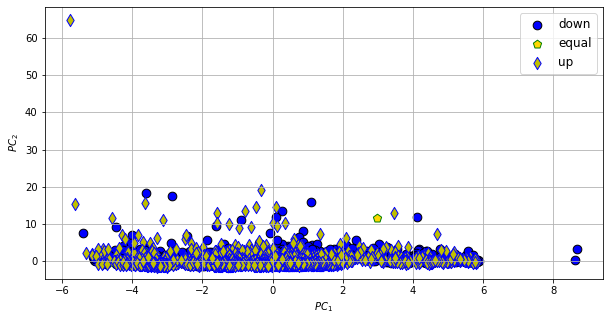

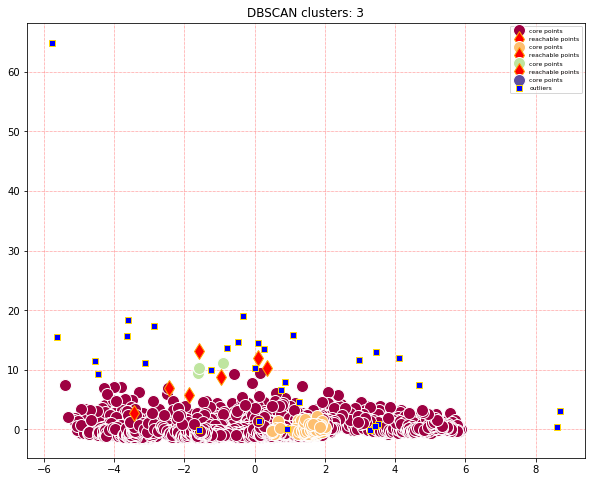


Clusters: 3
Noise: 31 



In [15]:
#biplot of PCA of aapl
fig = plt.figure(figsize=(10,5))
biplot(aapl_pca, aapl_label, aapl_label_name, 'pca')

#DBSCAN
aapl_pca_db = doDBSCAN(aapl_pca, 2.5, 4)

Explained variance ratio:
 [[4.51852615e-01]
 [2.82852776e-01]
 [1.21564099e-01]
 [7.82589259e-02]
 [4.92717537e-02]
 [1.55530790e-02]
 [5.73514937e-04]
 [6.93209791e-05]
 [3.91664487e-06]]


<AxesSubplot:>

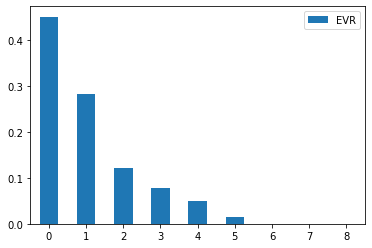

In [16]:
#Plotting the EVR
evr = evr.reshape((len(evr),1))
print('Explained variance ratio:\n', evr)

#convert the numpy array to a dataframe
df_evr = pd.DataFrame(evr, columns = ['EVR'])
df_evr.plot.bar(rot = 0)

In [17]:
#TSNE
#aapl_tsne,evr = doTSNE(aapl, 350, 'random') #perplexity = 350, init = random
aapl_tsne = doTSNE(aapl, 350, 'random') #perplexity = 350, init = random
print (aapl_tsne)
#print ('EVR = ',evr)

[[ -1.4611186  -3.8333492]
 [  3.9873314  -9.024012 ]
 [  4.004169   -9.981026 ]
 ...
 [-12.961528   -2.884276 ]
 [ -9.980993   -3.7732131]
 [ -0.7316467  -3.5715466]]


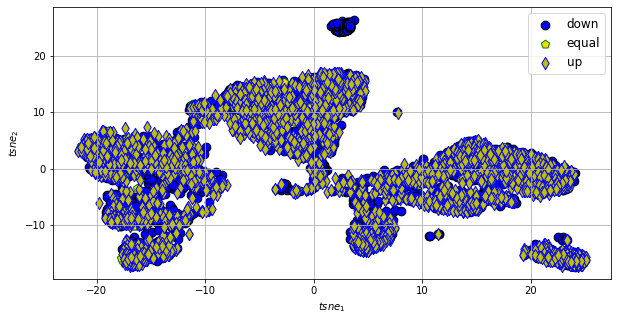

<Figure size 720x720 with 0 Axes>

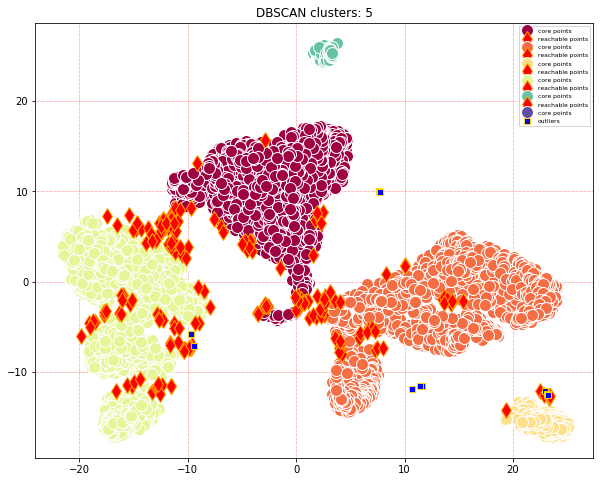


Clusters: 5
Noise: 15 



In [86]:
#biplot of TSNE of aapl
plt.figure(figsize=(10,5))
biplot(aapl_tsne, aapl_label, aapl_label_name, 'tsne')

#DBSCAN
plt.figure(figsize=(10,10))
aapl_tsne_db = doDBSCAN(aapl_tsne, 1.75, 30)

In [19]:
#LLE
aapl_lle = doLLE(aapl)
print (aapl_lle)
#print ('EVR = ',evr)

[[-0.00059686 -0.00389694]
 [-0.00056859 -0.00089398]
 [-0.00060178 -0.00079415]
 ...
 [-0.00024218 -0.00655369]
 [-0.00069762  0.00055398]
 [-0.00073537  0.00101756]]


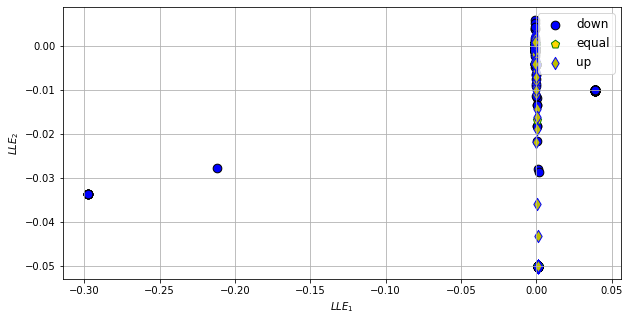

<Figure size 720x720 with 0 Axes>

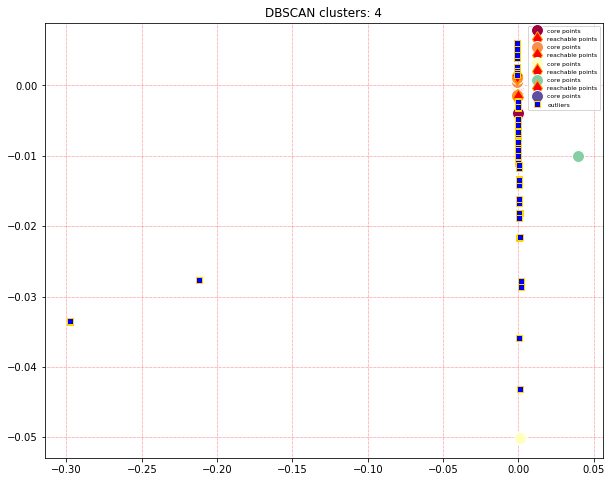


Clusters: 4
Noise: 59 



In [20]:
#biplot of LLE of aapl
plt.figure(figsize=(10,5))
biplot(aapl_lle, aapl_label, aapl_label_name, 'LLE')

#DBSCAN
plt.figure(figsize=(10,10))
aapl_lle_db = doDBSCAN(aapl_lle, 0.0005, 15)

AEO Dataset

In [21]:
#label for aeo
aeo_label, aeo_label_name = doLabel(df_aeo)
print('down:', np.sum(aeo_label[0]), 'equal:', np.sum(aeo_label[1]), 'up:', np.sum(aeo_label[2]))

down: 2384 equal: 1169 up: 2297


In [22]:
aeo = df_aeo.iloc[:,1::] #dropping the date column
#print(aeo)

In [23]:
#PCA
aeo_pca, evr = doPCA(aeo)
#aeo_pca = doPCA(aeo)
print (aeo_pca)
print ('EVR = ',evr)

[[-1.01969618e+00  1.07721664e+00 -2.67231061e-02 ...  9.37161445e-02
   7.65962358e-02 -4.70156379e-02]
 [-1.25017539e+00 -9.96418116e-01  3.47499642e-02 ...  5.82464866e-02
   3.18341913e-02 -1.68398126e-02]
 [-1.18446143e+00 -4.31808581e-01  2.31863690e-02 ...  2.75964185e-02
   2.58773090e-02  3.53790365e-03]
 ...
 [ 2.68521395e+00  2.89926595e+00 -7.63593965e-01 ... -1.06301403e-03
  -1.72929902e-02  1.05216864e-03]
 [ 2.90987870e+00  4.69788679e+00 -7.46791187e-01 ... -8.99500060e-03
  -1.83249587e-02  2.84648651e-03]
 [ 4.19910307e+00  1.49999850e+01 -6.69033204e-01 ...  2.01424946e-02
  -3.03672120e-02 -4.62850133e-03]]
EVR =  [5.23048436e-01 3.14333049e-01 1.42988015e-01 1.57778670e-02
 3.69875823e-03 6.05485848e-05 4.59453930e-05 3.49501710e-05
 1.24303820e-05]


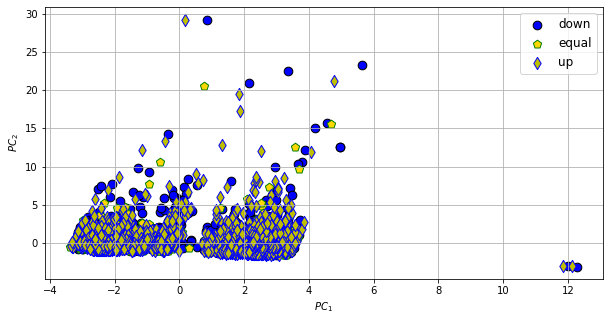

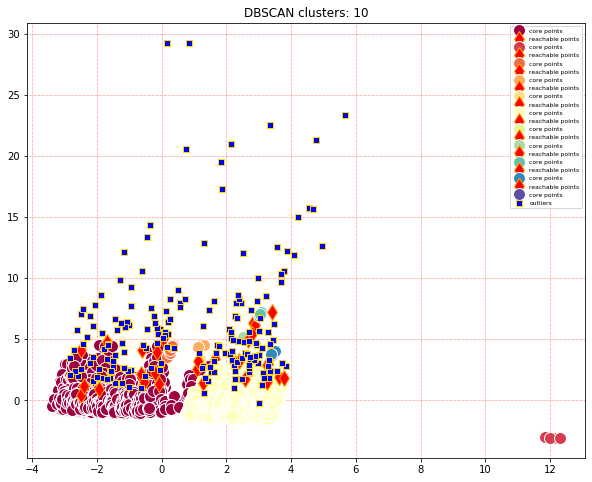


Clusters: 10
Noise: 192 



In [24]:
#biplot of PCA of aeo
fig = plt.figure(figsize=(10,5))
biplot(aeo_pca, aeo_label, aeo_label_name, 'pca')

#DBSCAN
aeo_pca_db = doDBSCAN(aeo_pca, 0.5, 3)

Explained variance ratio:
 [[5.23048436e-01]
 [3.14333049e-01]
 [1.42988015e-01]
 [1.57778670e-02]
 [3.69875823e-03]
 [6.05485848e-05]
 [4.59453930e-05]
 [3.49501710e-05]
 [1.24303820e-05]]


<AxesSubplot:>

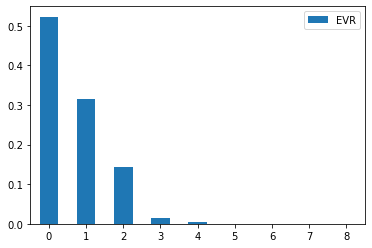

In [25]:
#Plotting the EVR
evr = evr.reshape((len(evr),1))
print('Explained variance ratio:\n', evr)

#convert the numpy array to a dataframe
df_evr = pd.DataFrame(evr, columns = ['EVR'])
df_evr.plot.bar(rot = 0)

In [26]:
#TSNE
#aeo_tsne,evr = doTSNE(aeo, 350, 'random') #perplexity = 350, init = random
aeo_tsne = doTSNE(aeo, 50, 'random') #perplexity = 50, init = random
print (aeo_tsne)
#print ('EVR = ',evr)

[[-27.665813  -17.040796 ]
 [-56.349403   -9.671202 ]
 [-51.95422   -11.908045 ]
 ...
 [  7.597739  -26.65718  ]
 [  2.7728448 -28.338568 ]
 [ -2.291315  -32.528362 ]]


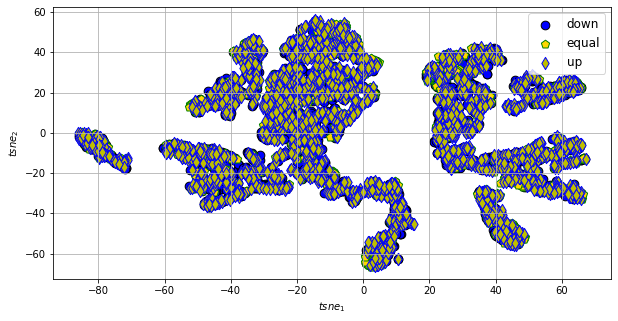

<Figure size 720x720 with 0 Axes>

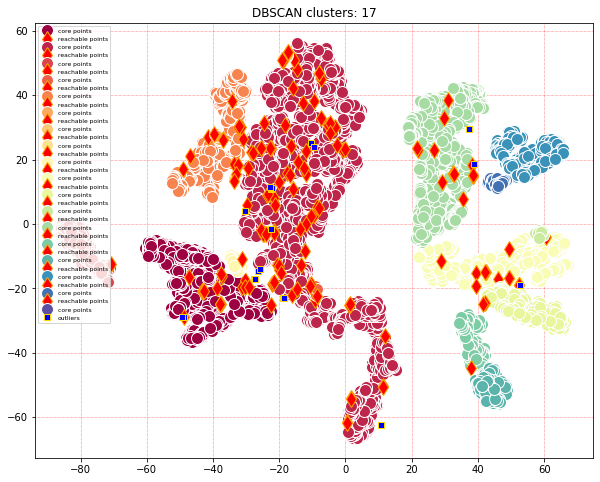


Clusters: 17
Noise: 26 



In [27]:
#biplot of TSNE of aeo
plt.figure(figsize=(10,5))
biplot(aeo_tsne, aeo_label, aeo_label_name, 'tsne')

#DBSCAN
plt.figure(figsize=(10,10))
aeo_tsne_db = doDBSCAN(aeo_tsne, 2, 7)

In [28]:
#LLE
aeo_lle = doLLE(aeo)
print (aeo_lle)
#print ('EVR = ',evr)

[[ 0.00740165  0.00601595]
 [ 0.03099138 -0.01928045]
 [ 0.03042578 -0.01841063]
 ...
 [ 0.00777182  0.01120372]
 [ 0.00773653  0.00303259]
 [ 0.00612923 -0.03393736]]


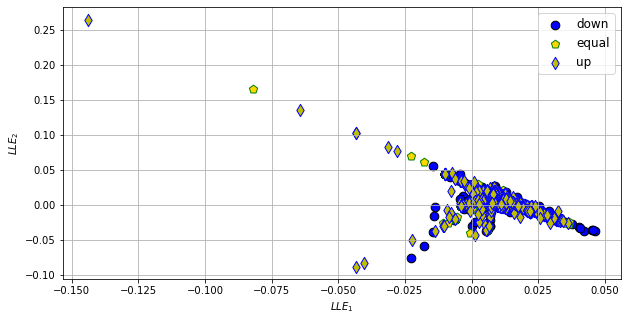

<Figure size 720x720 with 0 Axes>

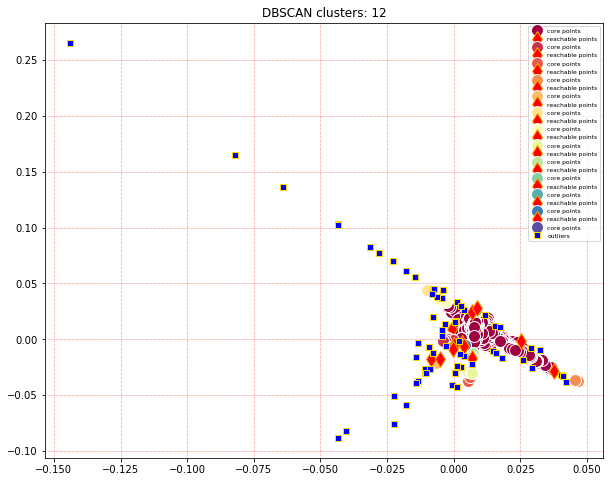


Clusters: 12
Noise: 63 



In [29]:
#biplot of LLE of aeo
plt.figure(figsize=(10,5))
biplot(aeo_lle, aeo_label, aeo_label_name, 'LLE')

#DBSCAN
plt.figure(figsize=(10,10))
aeo_lle_db = doDBSCAN(aeo_lle, 0.002,3)

BAC Dataset

In [30]:
#label for bac
bac_label, bac_label_name = doLabel(df_bac)
print('down:', np.sum(bac_label[0]), 'equal:', np.sum(bac_label[1]), 'up:', np.sum(bac_label[2]))

down: 2376 equal: 808 up: 2666


In [31]:
bac = df_bac.iloc[:,1::] #dropping the date column
#print(bac)

In [32]:
#PCA
bac_pca, evr = doPCA(bac)
#bac_pca = doPCA(aeo)
print (aeo_pca)
print ('EVR = ',evr)

[[-1.01969618e+00  1.07721664e+00 -2.67231061e-02 ...  9.37161445e-02
   7.65962358e-02 -4.70156379e-02]
 [-1.25017539e+00 -9.96418116e-01  3.47499642e-02 ...  5.82464866e-02
   3.18341913e-02 -1.68398126e-02]
 [-1.18446143e+00 -4.31808581e-01  2.31863690e-02 ...  2.75964185e-02
   2.58773090e-02  3.53790365e-03]
 ...
 [ 2.68521395e+00  2.89926595e+00 -7.63593965e-01 ... -1.06301403e-03
  -1.72929902e-02  1.05216864e-03]
 [ 2.90987870e+00  4.69788679e+00 -7.46791187e-01 ... -8.99500060e-03
  -1.83249587e-02  2.84648651e-03]
 [ 4.19910307e+00  1.49999850e+01 -6.69033204e-01 ...  2.01424946e-02
  -3.03672120e-02 -4.62850133e-03]]
EVR =  [5.93730648e-01 3.10168549e-01 7.42593850e-02 2.03538425e-02
 7.79695583e-04 4.12268330e-04 2.40985454e-04 4.68143749e-05
 7.81186012e-06]


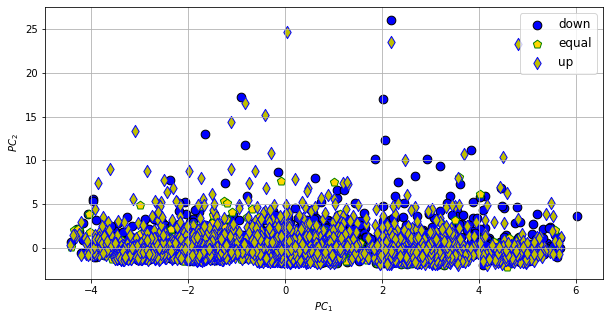

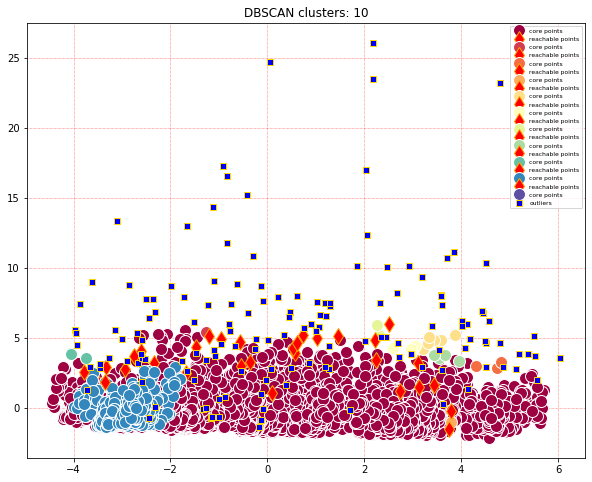


Clusters: 10
Noise: 146 



In [33]:
#biplot of PCA of bac
fig = plt.figure(figsize=(10,5))
biplot(bac_pca, bac_label, bac_label_name, 'pca')

#DBSCAN
bac_pca_db = doDBSCAN(bac_pca, 0.8, 2.5)

Explained variance ratio:
 [[5.93730648e-01]
 [3.10168549e-01]
 [7.42593850e-02]
 [2.03538425e-02]
 [7.79695583e-04]
 [4.12268330e-04]
 [2.40985454e-04]
 [4.68143749e-05]
 [7.81186012e-06]]


<AxesSubplot:>

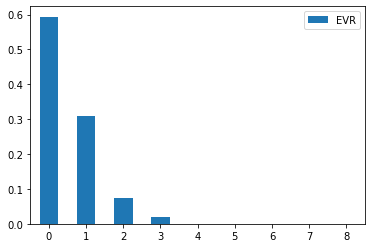

In [34]:
#Plotting the EVR
evr = evr.reshape((len(evr),1))
print('Explained variance ratio:\n', evr)

#convert the numpy array to a dataframe
df_evr = pd.DataFrame(evr, columns = ['EVR'])
df_evr.plot.bar(rot = 0)

In [35]:
#TSNE
#bac_tsne,evr = doTSNE(aeo, 350, 'random') #perplexity = 350, init = random
bac_tsne = doTSNE(bac, 50, 'random') #perplexity = 50, init = random
print (bac_tsne)
#print ('EVR = ',evr)

[[  6.4768662   9.34668  ]
 [ -6.0698977   9.47111  ]
 [ -4.5847626  10.462495 ]
 ...
 [ 30.55177   -35.537132 ]
 [  7.9010477   1.605385 ]
 [  7.779707    8.242378 ]]


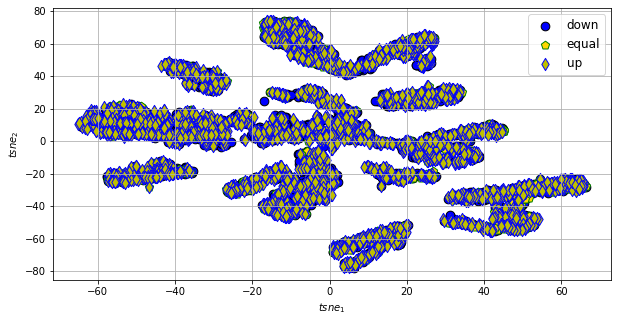

<Figure size 720x720 with 0 Axes>

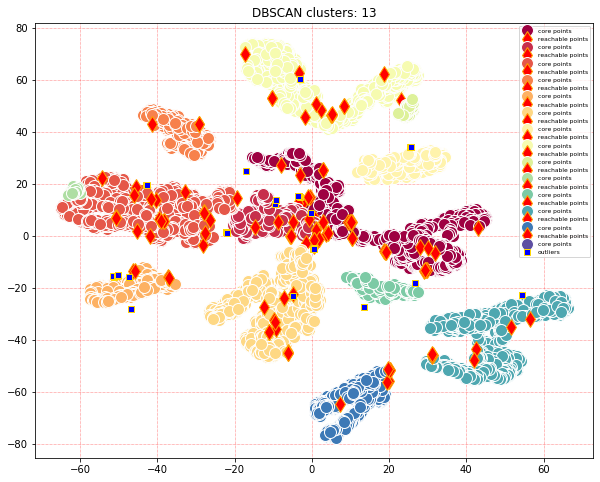


Clusters: 13
Noise: 38 



In [36]:
#biplot of TSNE of bac
plt.figure(figsize=(10,5))
biplot(bac_tsne, bac_label, bac_label_name, 'tsne')

#DBSCAN
plt.figure(figsize=(10,10))
bac_tsne_db = doDBSCAN(bac_tsne, 2, 7)

In [37]:
#LLE
bac_lle = doLLE(bac)
print (bac_lle)
#print ('EVR = ',evr)

[[-6.81359864e-04 -4.53005508e-03]
 [ 2.96407948e-04 -1.37324674e-02]
 [ 3.00511643e-06 -1.36236839e-02]
 ...
 [ 7.28553971e-04 -1.35730587e-02]
 [ 4.73595704e-03 -1.43744235e-02]
 [-3.36876596e-03 -4.92909485e-03]]


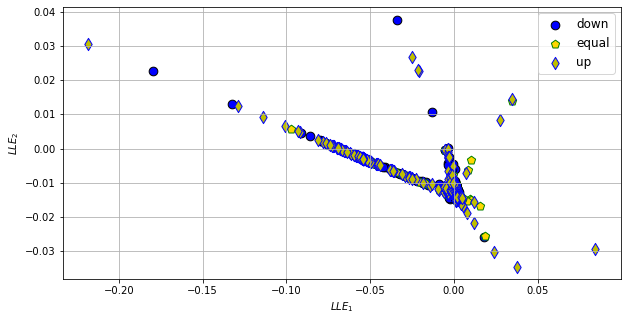

<Figure size 720x720 with 0 Axes>

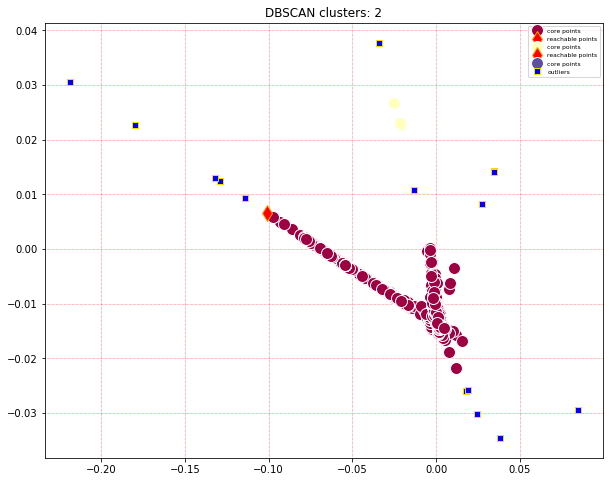


Clusters: 2
Noise: 15 



In [38]:
#biplot of LLE of bac
plt.figure(figsize=(10,5))
biplot(bac_lle, bac_label, bac_label_name, 'LLE')

#DBSCAN
plt.figure(figsize=(10,10))
bac_lle_db = doDBSCAN(bac_lle, 0.007,3)

WMT Dataset

In [39]:
#label for wmt
wmt_label, wmt_label_name = doLabel(df_wmt)
print('down:', np.sum(wmt_label[0]), 'equal:', np.sum(wmt_label[1]), 'up:', np.sum(wmt_label[2]))

down: 2655 equal: 396 up: 2799


In [40]:
wmt = df_wmt.iloc[:,1::] #dropping the date column
#print(wmt)

In [41]:
#PCA
wmt_pca, evr = doPCA(wmt)
#wmt_pca = doPCA(wmt)
print (wmt_pca)
print ('EVR = ',evr)

[[ 3.31595426e+00  1.20236077e+01  2.93139774e+00 ... -3.16565109e-01
   6.60230364e-02  1.73705832e-02]
 [ 1.59265295e+00  9.23722866e+00  1.57028355e+00 ... -1.69807451e-01
   1.64291806e-01 -6.03728511e-02]
 [ 1.18713415e-01  6.68728299e+00  5.88706910e-01 ... -1.28953982e-01
   6.08999722e-02 -3.57864168e-02]
 ...
 [ 2.63168524e+00  1.82675648e+00 -5.56806029e-02 ... -7.79889880e-03
   7.39801613e-03  3.11971469e-04]
 [ 3.62596021e+00  4.32549247e+00  4.62787450e-01 ... -5.53568002e-03
   2.35785654e-03 -7.06263125e-03]
 [ 4.91335367e+00  7.35658121e+00  1.19460866e+00 ... -9.71150942e-03
  -9.93457325e-03  3.46527328e-03]]
EVR =  [6.09690101e-01 2.79484669e-01 9.43686934e-02 1.60482267e-02
 2.30893284e-04 9.59540804e-05 4.73291356e-05 2.87542904e-05
 5.37906211e-06]


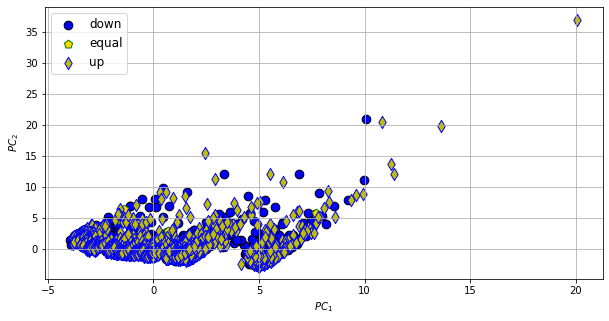

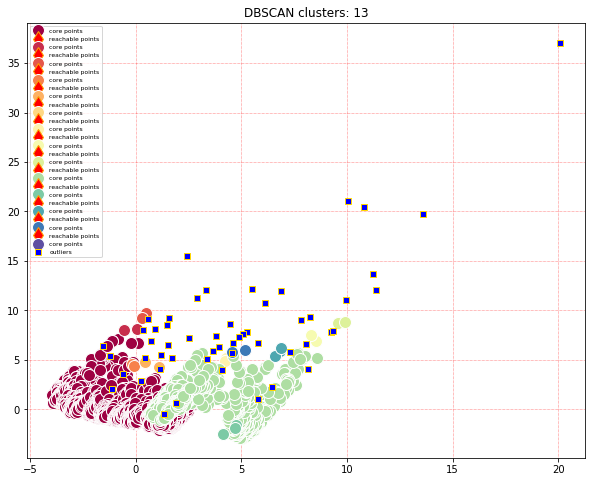


Clusters: 13
Noise: 53 



In [42]:
#biplot of PCA of wmt
fig = plt.figure(figsize=(10,5))
biplot(wmt_pca, wmt_label, wmt_label_name, 'pca')

#DBSCAN
wmt_pca_db = doDBSCAN(wmt_pca, 1, 2)

Explained variance ratio:
 [[6.09690101e-01]
 [2.79484669e-01]
 [9.43686934e-02]
 [1.60482267e-02]
 [2.30893284e-04]
 [9.59540804e-05]
 [4.73291356e-05]
 [2.87542904e-05]
 [5.37906211e-06]]


<AxesSubplot:>

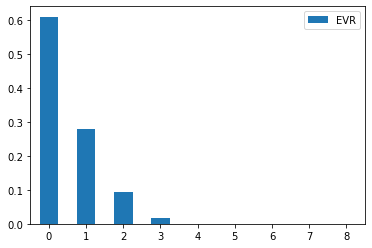

In [43]:
#Plotting the EVR
evr = evr.reshape((len(evr),1))
print('Explained variance ratio:\n', evr)

#convert the numpy array to a dataframe
df_evr = pd.DataFrame(evr, columns = ['EVR'])
df_evr.plot.bar(rot = 0)

In [44]:
#TSNE
wmt_tsne = doTSNE(wmt, 350, 'random') #perplexity = 350, init = random
print (wmt_tsne)
#print ('EVR = ',evr)

[[ 10.92211   -21.446035 ]
 [-16.86306     1.9877863]
 [-17.466671    2.188452 ]
 ...
 [  7.765563  -23.543566 ]
 [ 10.709991  -23.393717 ]
 [ 11.488818  -22.485731 ]]


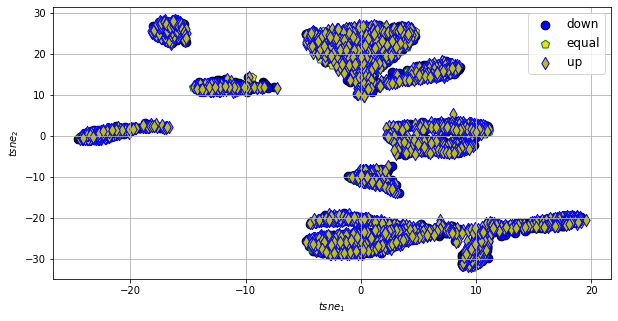

<Figure size 720x720 with 0 Axes>

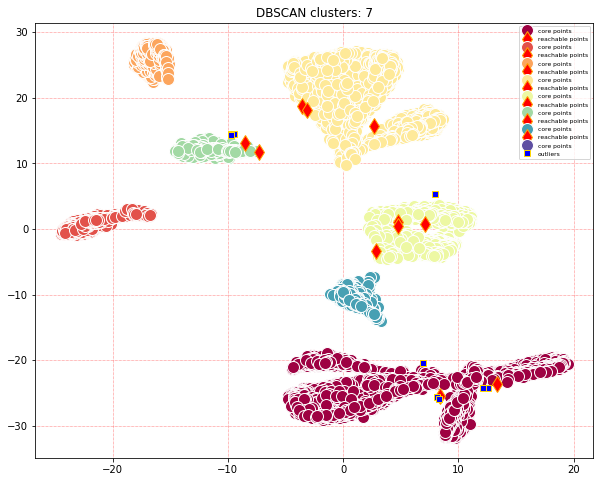


Clusters: 7
Noise: 9 



In [54]:
#biplot of TSNE of wmt
plt.figure(figsize=(10,5))
biplot(wmt_tsne, wmt_label, wmt_label_name, 'tsne')

#DBSCAN
plt.figure(figsize=(10,10))
wmt_tsne_db = doDBSCAN(wmt_tsne, 1, 6)

In [46]:
#LLE
#aapl_tsne,evr = doTSNE(aapl, 350, 'random') #perplexity = 350, init = random
wmt_lle = doLLE(wmt)
print (wmt_lle)
#print ('EVR = ',evr)

[[-0.0123831  -0.01903417]
 [-0.01598679  0.00170083]
 [-0.01895547  0.00672903]
 ...
 [-0.01989495  0.00760846]
 [-0.03574125  0.00197438]
 [-0.02045746  0.00286576]]


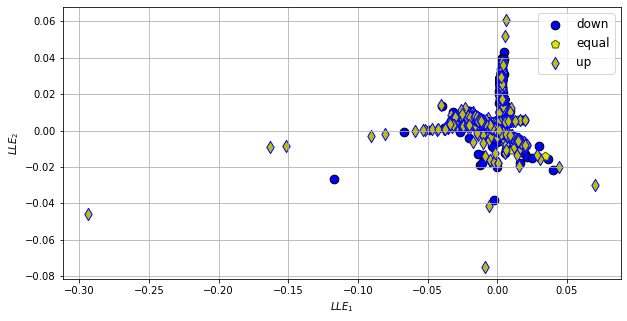

<Figure size 720x720 with 0 Axes>

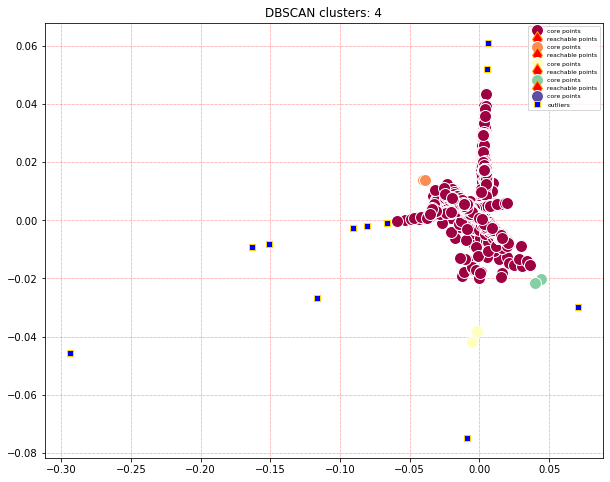


Clusters: 4
Noise: 11 



In [47]:
#biplot of LLE of aapl
plt.figure(figsize=(10,5))
biplot(wmt_lle, wmt_label, wmt_label_name, 'LLE')

#DBSCAN
plt.figure(figsize=(10,10))
wmt_lle_db = doDBSCAN(wmt_lle, 0.006, 2)

# Compute the variance concentration ratios of data and visualize it. Compare the variance concentration ratios of the normalized data of the data by using different normalization methods

In [55]:
#Variance Composition Ratio
def doVCR(x_mat):    
  s = np.linalg.svd(x_mat, compute_uv=False)    
  rate = s[0] / np.sum(s)    
  return rate

In [56]:
stocks = ['AAPL',
          'BAC',
          'WMT',
          'AEO']

var_concentration_rate=np.zeros((len(stocks),3))

i=0
for s in stocks:
  df = pd.read_csv(s+'_n.csv',index_col=0)
  df1=df.iloc[:, 1:df.shape[1]]
  var_concentration_rate[i,0] = doVCR(df1)
  var_concentration_rate[i,1] = doVCR(doNormalization(df1,1))
  var_concentration_rate[i,2] = doVCR(doNormalization(df1,0))
  #var_concentration_rate[i,3] = doVCR(doNormalization(df1,2))
  i=i+1



var_concentration_rate_df = pd.DataFrame(data=var_concentration_rate, 
                                       columns=['raw data', 
                                              'standard normalization',
                                              'minmax normalization'],
                                               #'robust normalization'],
                                       index=stocks)

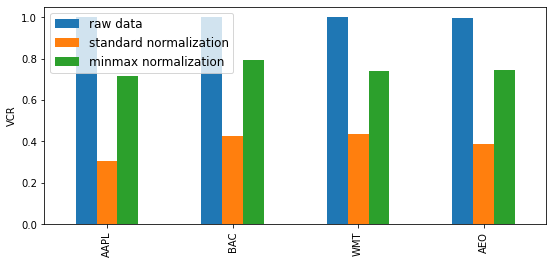

In [87]:
#Plot the VCR
var_concentration_rate_df.plot(kind='bar', figsize=(9,4))
plt.ylabel('VCR')
plt.legend(prop={'size':12})
plt.savefig('VCRs.png')
plt.show()

# Apply 1,2,3 to at least your own two datasets in finance

In [58]:
filename=['MS.csv', 'GS.csv', 'NKE.csv']

df_ms = pd.read_csv(filename[0])
df_gs = pd.read_csv(filename[1])
df_nike = pd.read_csv(filename[2])

#print (df_nike.shape)
print (df_nike.head(5))

#dropping the date column
df_ms = df_ms.iloc[:,1::]
df_gs = df_gs.iloc[:,1::]
df_nike = df_nike.iloc[:,1::]

#making the column names align with the column names in the functions defined earlier
datasets = [df_ms,df_gs,df_nike]
for i in datasets:
    i.columns = 'market' + i.columns

print (df_ms.head(5))

         Date      Open      High       Low     Close  Adj Close   Volume
0  2000-01-03  6.164063  6.195313  5.968750  6.015625   4.791836  8014400
1  2000-01-04  5.875000  5.914063  5.671875  5.687500   4.530463  9810400
2  2000-01-05  5.718750  6.046875  5.718750  6.015625   4.791836  6542400
3  2000-01-06  5.984375  5.984375  5.820313  5.984375   4.766945  4891200
4  2000-01-07  5.960938  6.000000  5.875000  5.984375   4.766945  3993600
   marketOpen  marketHigh  marketLow  marketClose  marketAdj Close  \
0     68.6250    69.00000   66.06250     67.50000        38.351860   
1     66.0000    66.12500   61.50000     62.50000        35.510979   
2     62.0000    62.09375   58.62500     60.21875        34.214809   
3     60.1875    62.46875   60.12500     61.37500        34.871773   
4     60.2500    63.46875   59.71875     63.28125        35.954857   

   marketVolume  
0       5309000  
1       6234400  
2       7744200  
3       6586000  
4       6324800  


<AxesSubplot:>

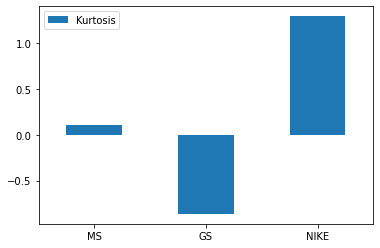

In [59]:
#kurtosis
ms_kurtosis = df_ms['marketClose'].kurtosis()
gs_kurtosis = df_gs['marketClose'].kurtosis()
nike_kurtosis = df_nike['marketClose'].kurtosis()

kurtosis = np.array([ms_kurtosis,gs_kurtosis, nike_kurtosis])
datasets = ['MS','GS','NIKE']

kurtosis = kurtosis.reshape((len(kurtosis),1))

df_kurtosis = pd.DataFrame(kurtosis, columns = ['Kurtosis'], index = datasets)
df_kurtosis.plot.bar(rot = 0)

Morgan Stanley (MS) dataset

In [60]:
#label for ms
ms_label, ms_label_name = doLabel(df_ms)
print('down:', np.sum(ms_label[0]), 'equal:', np.sum(ms_label[1]), 'up:', np.sum(ms_label[2]))

down: 2633 equal: 54 up: 2635


In [61]:
#PCA
ms_pca, evr = doPCA(df_ms)
print (ms_pca)
print ('EVR = ',evr)

[[-2.65257237e+00  6.70537813e-02  6.75104216e-01 -4.41561876e-02
   2.12164716e-02 -2.68123043e-02]
 [-2.16925253e+00  1.14278937e-02  7.21367918e-01 -1.38791311e-01
   8.83093871e-02 -1.64919815e-02]
 [-1.77336280e+00  3.02889195e-02  6.72209533e-01 -7.08327438e-02
   4.97682362e-02 -3.72139713e-02]
 ...
 [-4.98156745e+00  1.47019722e+00 -1.93515828e+00  7.64106799e-02
   3.00684526e-02  5.54829222e-03]
 [-5.02913456e+00  1.39200487e+00 -1.79194136e+00 -9.11505077e-02
   5.50347527e-02  2.23306501e-02]
 [-4.40760047e+00  2.70720663e+00 -1.66459846e+00 -5.52904427e-02
  -3.84973133e-03  1.32566761e-02]]
EVR =  [8.39310210e-01 1.20869696e-01 3.93366716e-02 2.75801409e-04
 1.73818949e-04 3.38021259e-05]


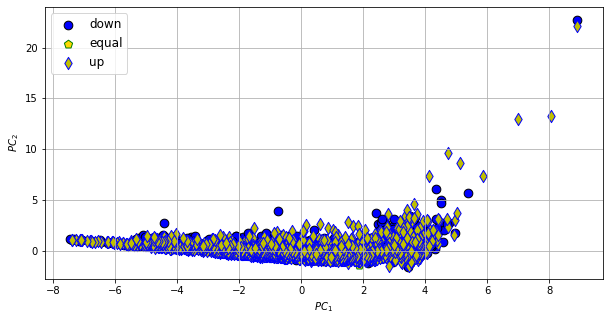

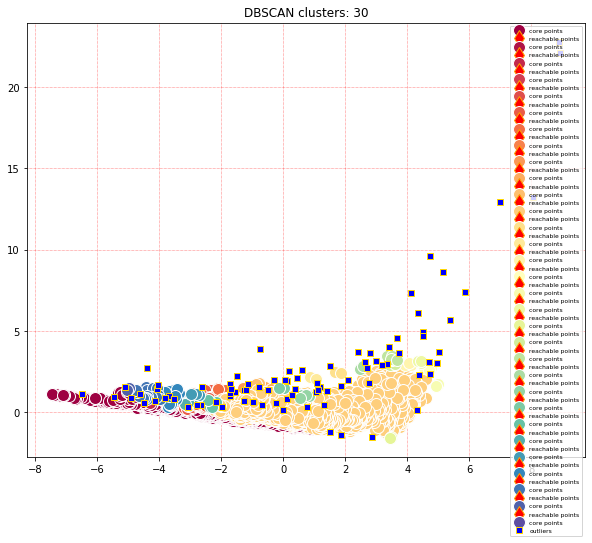


Clusters: 30
Noise: 87 



In [62]:
#biplot of PCA of ms
fig = plt.figure(figsize=(10,5))
biplot(ms_pca, ms_label, ms_label_name, 'pca')

#DBSCAN
ms_pca_db = doDBSCAN(ms_pca, 0.25,2)

Explained variance ratio:
 [[8.39310210e-01]
 [1.20869696e-01]
 [3.93366716e-02]
 [2.75801409e-04]
 [1.73818949e-04]
 [3.38021259e-05]]


<AxesSubplot:>

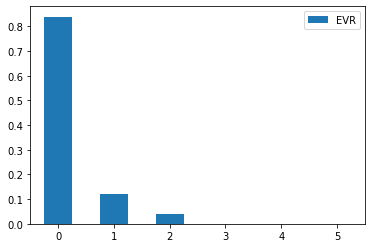

In [63]:
#Plotting the EVR
evr = evr.reshape((len(evr),1))
print('Explained variance ratio:\n', evr)

#convert the numpy array to a dataframe
df_evr = pd.DataFrame(evr, columns = ['EVR'])
df_evr.plot.bar(rot = 0)

In [64]:
#TSNE
ms_tsne = doTSNE(df_ms, 150, 'random') #perplexity = 150, init = random
print (ms_tsne)
#print ('EVR = ',evr)

[[-33.368366   -4.6556587]
 [-32.25943    -8.997129 ]
 [-24.135923  -12.802013 ]
 ...
 [-33.096283   15.012552 ]
 [-33.10867    14.963283 ]
 [-33.054028   15.86217  ]]


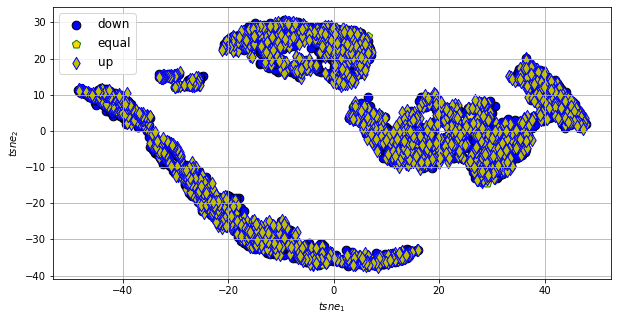

<Figure size 720x720 with 0 Axes>

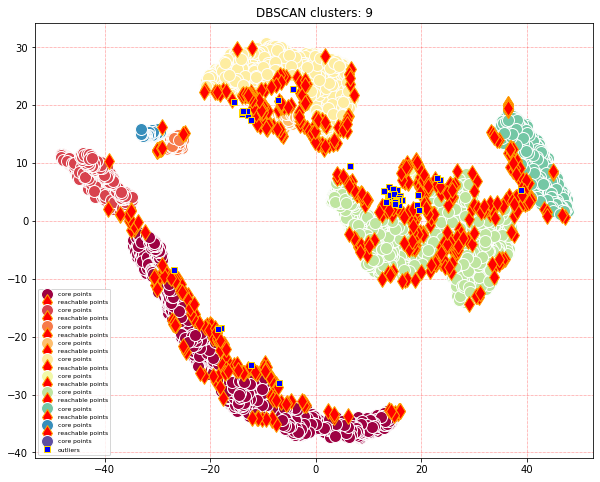


Clusters: 9
Noise: 47 



In [65]:
#biplot of TSNE of ms
plt.figure(figsize=(10,5))
biplot(ms_tsne, ms_label, ms_label_name, 'tsne')

#DBSCAN
plt.figure(figsize=(10,10))
ms_tsne_db = doDBSCAN(ms_tsne, 2, 30)

In [66]:
#LLE
ms_lle = doLLE(df_ms)
print (ms_lle)

[[ 0.01921344 -0.00375232]
 [ 0.02156798 -0.00322464]
 [ 0.02424369 -0.00260886]
 ...
 [-0.00029508 -0.0176034 ]
 [-0.00028246 -0.0175762 ]
 [-0.00024201 -0.01748905]]


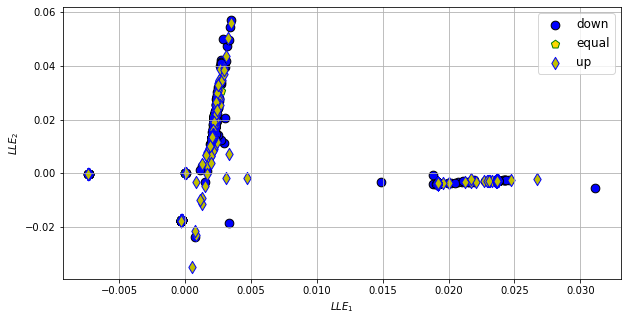

<Figure size 720x720 with 0 Axes>

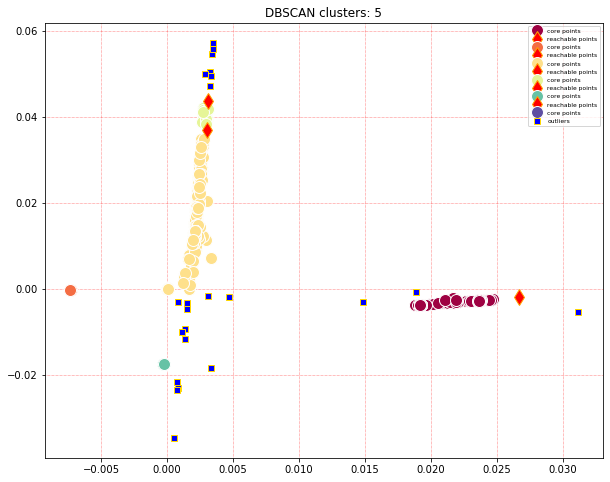


Clusters: 5
Noise: 23 



In [67]:
#biplot of LLE of ms
plt.figure(figsize=(10,5))
biplot(ms_lle, ms_label, ms_label_name, 'LLE')

#DBSCAN
plt.figure(figsize=(10,10))
ms_lle_db = doDBSCAN(ms_lle, 0.002,4)

Goldman Sachs (GS) Stock 

In [68]:
#label for gs
gs_label, gs_label_name = doLabel(df_gs)
print('down:', np.sum(gs_label[0]), 'equal:', np.sum(gs_label[1]), 'up:', np.sum(gs_label[2]))

down: 2608 equal: 26 up: 2688


In [69]:
#PCA
gs_pca, evr = doPCA(df_gs)
print (gs_pca)
print ('EVR = ',evr)

[[-2.57710522e+00 -7.42372400e-01 -7.60479393e-02  7.95420655e-02
   5.89449243e-02 -1.20948665e-03]
 [-2.82176306e+00 -7.85978338e-01 -4.31185639e-02  5.85559196e-02
   4.31288899e-02  1.47721092e-03]
 [-3.00881913e+00 -8.19256200e-01 -1.13602399e-02  2.88431265e-02
   2.24572834e-02  5.01171308e-03]
 ...
 [ 7.40580080e+00  1.71563276e-01  3.51573598e-01 -1.17112225e-01
   6.87506774e-02  4.36932204e-03]
 [ 7.55807452e+00  2.33416237e-01  2.05537269e-01  8.68336719e-02
   3.74907836e-02  1.36354912e-02]
 [ 7.24160425e+00  1.32822839e-01  1.92415999e-01  9.59087105e-02
   4.12556477e-02  2.74352147e-02]]
EVR =  [8.32572521e-01 1.64549232e-01 2.53423262e-03 2.06066419e-04
 1.13806630e-04 2.41417537e-05]


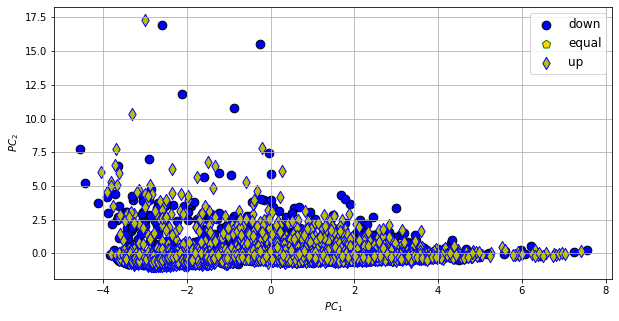

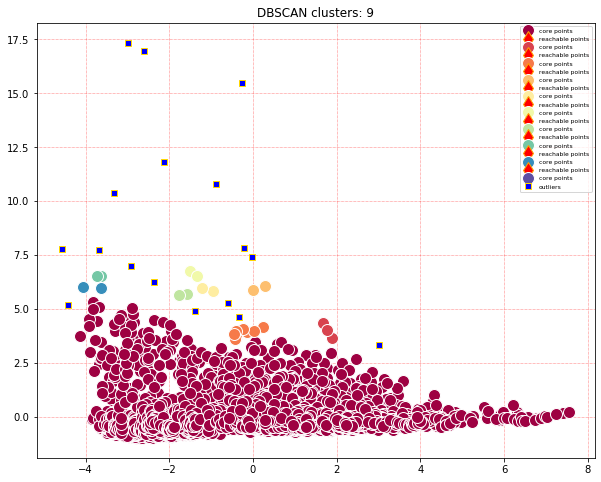


Clusters: 9
Noise: 17 



In [70]:
#biplot of PCA of gs
fig = plt.figure(figsize=(10,5))
biplot(gs_pca, gs_label, gs_label_name, 'pca')

#DBSCAN
gs_pca_db = doDBSCAN(gs_pca, 0.5,1.5)

Explained variance ratio:
 [[8.32572521e-01]
 [1.64549232e-01]
 [2.53423262e-03]
 [2.06066419e-04]
 [1.13806630e-04]
 [2.41417537e-05]]


<AxesSubplot:>

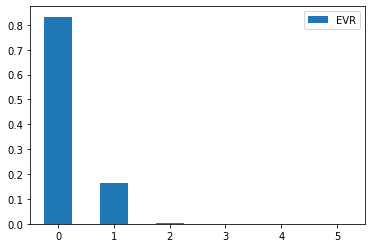

In [71]:
#Plotting the EVR
evr = evr.reshape((len(evr),1))
print('Explained variance ratio:\n', evr)

#convert the numpy array to a dataframe
df_evr = pd.DataFrame(evr, columns = ['EVR'])
df_evr.plot.bar(rot = 0)

In [72]:
#TSNE
gs_tsne = doTSNE(df_gs, 50, 'random') #perplexity = 50, init = random
print (gs_tsne)
#print ('EVR = ',evr)

[[-37.28669  -46.15553 ]
 [-46.718704 -46.94332 ]
 [-50.653095 -47.175117]
 ...
 [ 24.314713 -48.979427]
 [ 24.370823 -49.14291 ]
 [ 24.653002 -49.02942 ]]


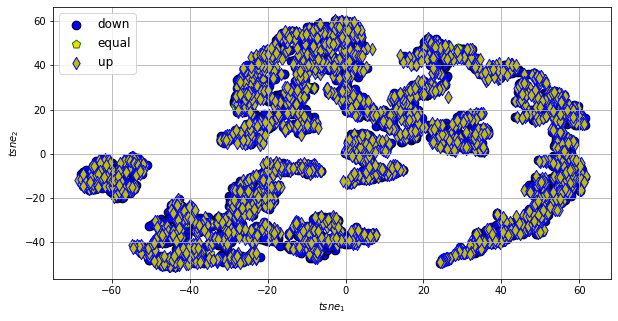

<Figure size 720x720 with 0 Axes>

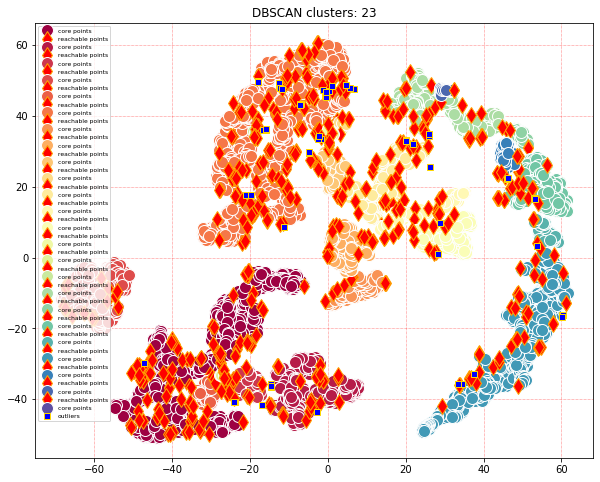


Clusters: 23
Noise: 64 



In [73]:
#biplot of TSNE of gs
plt.figure(figsize=(10,5))
biplot(gs_tsne, gs_label, gs_label_name, 'tsne')

#DBSCAN
plt.figure(figsize=(10,10))
gs_tsne_db = doDBSCAN(gs_tsne, 2, 10)

In [74]:
#LLE
gs_lle = doLLE(df_gs)
print (gs_lle)

[[ 0.01143771 -0.00016957]
 [ 0.0202166  -0.0013524 ]
 [ 0.03976404  0.01010101]
 ...
 [ 0.00142629  0.13463176]
 [ 0.00136884  0.13578522]
 [ 0.00161286  0.13088581]]


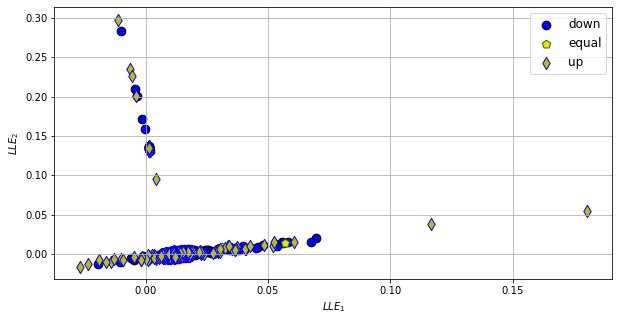

<Figure size 720x720 with 0 Axes>

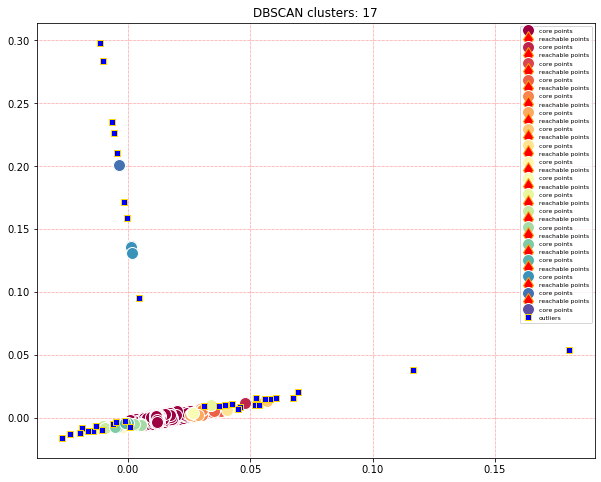


Clusters: 17
Noise: 37 



In [75]:
#biplot of LLE of gs
plt.figure(figsize=(10,5))
biplot(gs_lle, gs_label, gs_label_name, 'LLE')

#DBSCAN
plt.figure(figsize=(10,10))
gs_lle_db = doDBSCAN(gs_lle, 0.0015,1.75)

Nike(NKE) Dataset

In [76]:
#label for nke
nike_label, nike_label_name = doLabel(df_nike)
print('down:', np.sum(nike_label[0]), 'equal:', np.sum(nike_label[1]), 'up:', np.sum(nike_label[2]))

down: 2563 equal: 38 up: 2721


In [77]:
#PCA
nike_pca, evr = doPCA(df_nike)
print (nike_pca)
print ('EVR = ',evr)

[[-1.84534841e+00 -7.16247828e-01  1.99404563e-02  9.87349823e-03
  -2.72163707e-03  2.86469593e-04]
 [-1.90963907e+00 -4.61598021e-01  2.03977678e-02  1.04456856e-02
  -3.78859256e-03  1.00761097e-03]
 [-1.82213203e+00 -9.29876290e-01  2.92743979e-02  4.13596643e-03
   3.42794917e-03  1.11021867e-03]
 ...
 [ 7.54617056e+00  6.11855545e-01  6.29543796e-02 -7.85910121e-03
  -2.07927014e-02 -1.08260435e-02]
 [ 7.65081693e+00  5.28108486e-01  5.23743626e-03  6.48519973e-02
   1.32652654e-02  1.21527039e-02]
 [ 7.53433075e+00  6.52586833e-01  3.68756836e-02  3.89724242e-02
  -5.84957966e-03 -4.80598072e-03]]
EVR =  [8.52410803e-01 1.47444544e-01 9.35142944e-05 2.66948389e-05
 2.04428713e-05 4.00044345e-06]


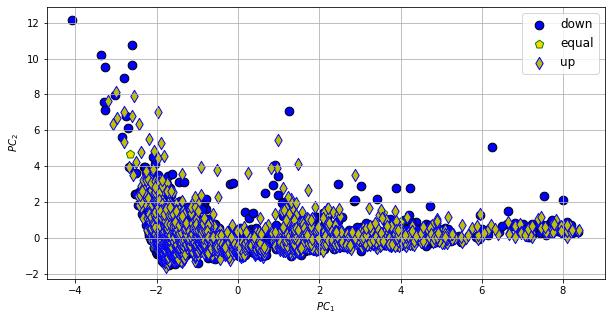

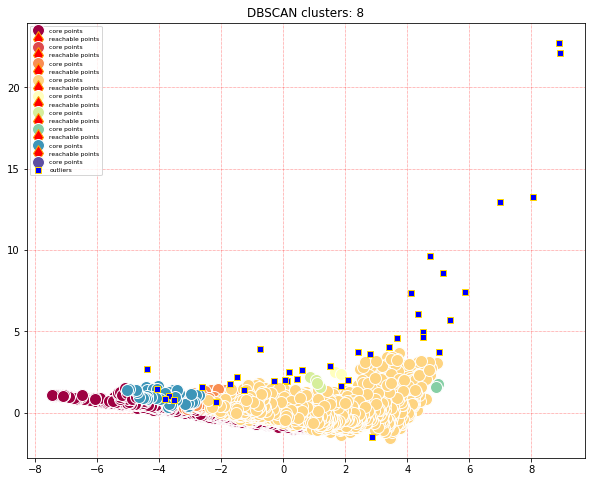


Clusters: 8
Noise: 38 



In [78]:
#biplot of PCA of nike
fig = plt.figure(figsize=(10,5))
biplot(nike_pca, nike_label, nike_label_name, 'pca')

#DBSCAN
ms_pca_db = doDBSCAN(ms_pca, 0.4,2)

Explained variance ratio:
 [[8.52410803e-01]
 [1.47444544e-01]
 [9.35142944e-05]
 [2.66948389e-05]
 [2.04428713e-05]
 [4.00044345e-06]]


<AxesSubplot:>

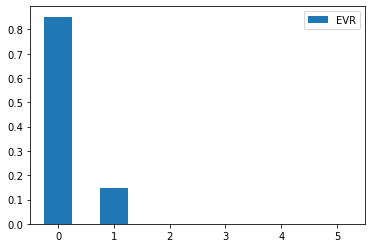

In [79]:
#Plotting the EVR
evr = evr.reshape((len(evr),1))
print('Explained variance ratio:\n', evr)

#convert the numpy array to a dataframe
df_evr = pd.DataFrame(evr, columns = ['EVR'])
df_evr.plot.bar(rot = 0)

In [80]:
#TSNE
nike_tsne = doTSNE(df_nike, 50, 'random') #perplexity = 150, init = random
print (nike_tsne)
#print ('EVR = ',evr)

[[ 52.3511       0.30325457]
 [ 39.338646    -8.024185  ]
 [ 61.22454      7.6226325 ]
 ...
 [ 35.859848   -39.744358  ]
 [ 36.538063   -39.535778  ]
 [ 35.68491    -39.6473    ]]


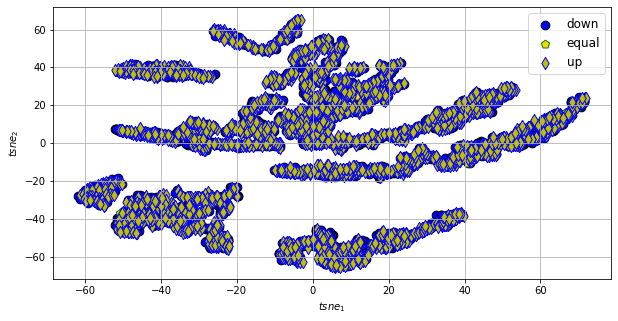

<Figure size 720x720 with 0 Axes>

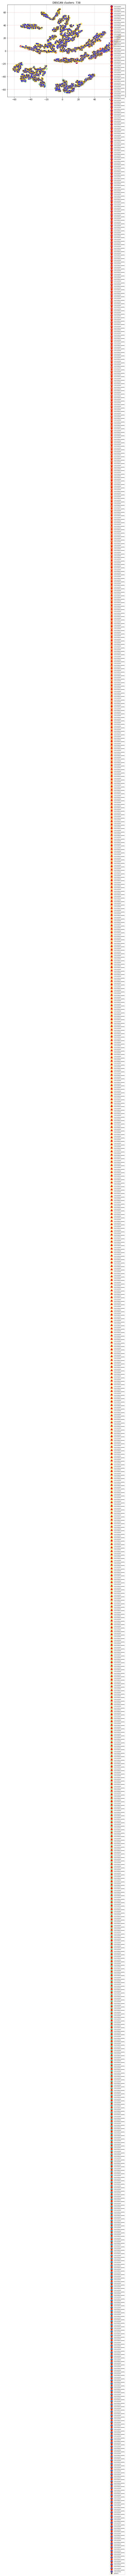


Clusters: 738
Noise: 3673 



In [81]:
#biplot of TSNE of nike
plt.figure(figsize=(10,5))
biplot(nike_tsne, nike_label, nike_label_name, 'tsne')

#DBSCAN
plt.figure(figsize=(10,10))
nike_tsne_db = doDBSCAN(nike_tsne, 0.25, 1.25)

In [82]:
#LLE
nike_lle = doLLE(df_nike)
print (nike_lle)

[[ 0.01524158  0.00014981]
 [ 0.01530464  0.00011707]
 [ 0.01524204  0.00014806]
 ...
 [ 0.00017313 -0.08811458]
 [ 0.00017455 -0.08811193]
 [ 0.00017371 -0.0881135 ]]


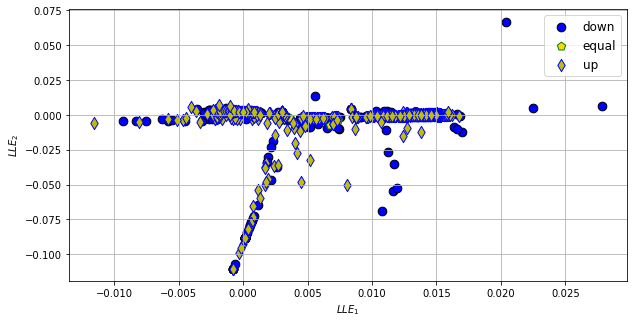

<Figure size 720x720 with 0 Axes>

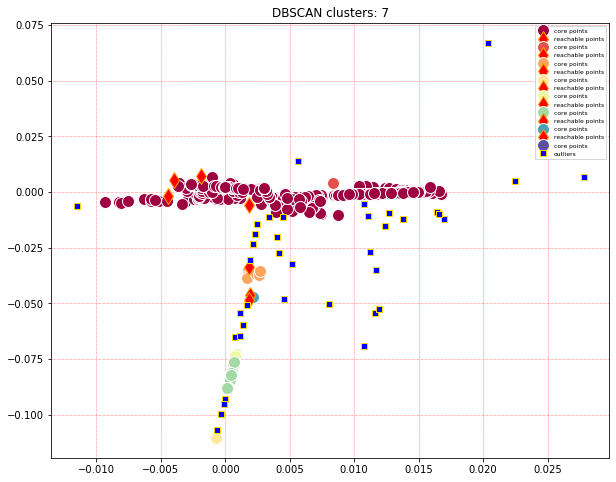


Clusters: 7
Noise: 38 



In [83]:
#biplot of LLE of nike
plt.figure(figsize=(10,5))
biplot(nike_lle, nike_label, nike_label_name, 'LLE')

#DBSCAN
plt.figure(figsize=(10,10))
nike_lle_db = doDBSCAN(nike_lle, 0.002,3)

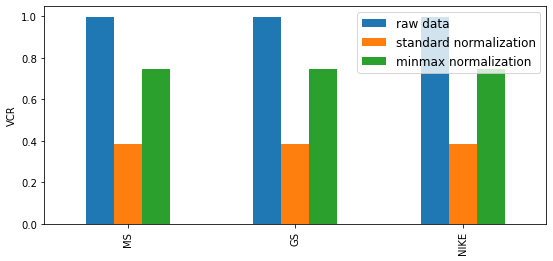

In [89]:
var_concentration_rate = np.zeros((len(datasets),3))

i=0

for d in datasets:
    #print (d)
    #df = pd.read_csv(s+'_n.csv',index_col=0)
    df1=df.iloc[:, 1:df.shape[1]]
    var_concentration_rate[i,0] = doVCR(df1)
    var_concentration_rate[i,1] = doVCR(doNormalization(df1,1))
    var_concentration_rate[i,2] = doVCR(doNormalization(df1,0))
    #var_concentration_rate[i,3] = doVCR(doNormalizaton(df1,2))
    i=i+1



var_concentration_rate_df = pd.DataFrame(data = var_concentration_rate, 
                                       columns=['raw data', 
                                              'standard normalization',
                                              'minmax normalization'],
                                               #'robust normalization'], 
                                         index=datasets)


#Plot the VCR
var_concentration_rate_df.plot(kind='bar', figsize=(9,4))
plt.ylabel('VCR')
plt.legend(prop={'size':12})
plt.savefig('VCR2.png')
plt.show()